# TP2

In [1]:
#%pip install numpy pandas matplotlib scikit-learn torch

In [2]:
import Utils as ut
import Models
import Train
import numpy as np
from Utils import Timer
from Models import Cluster
from Preprocesses import Preprocesses

Lecture fichier

In [3]:
df_hiseq = ut.read_csv()
df_ecg = ut.read_ecg()

## Prétraitement

In [4]:
clean = Preprocesses(df_hiseq)
df_hiseq =clean.drop('Class')

df_hiseq_acp = clean.pca()


## Clustering
La segmentation des données sans ACP en utilisant les techniques de KMeans, DBSCAN et spectral Cluster avec leur affichage.

### KMeans

Temps d'exécution kmeans: 5.4455 secondes
Mémoire actuelle : 0.18 MB
Pic mémoire : 263.53 MB
Temps d'exécution KMEANS - ACP: 0.0210 secondes
Mémoire actuelle : 0.01 MB
Pic mémoire : 1.35 MB


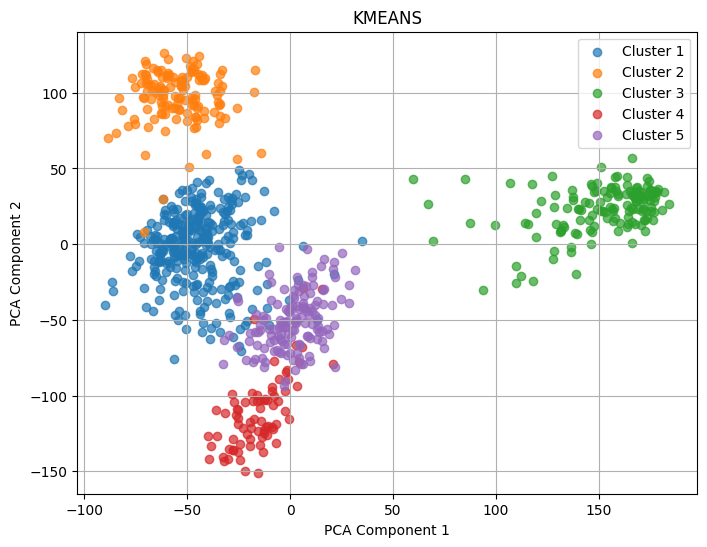

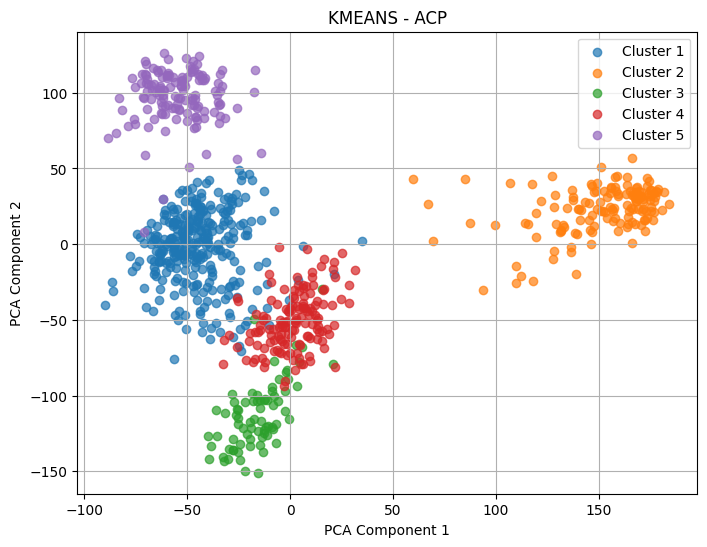

Méthode: KMeans
Silhouette Score:  0.22488527683456985
Davies-Bouldin Index:  1.8312963835948157
Indice de Calinski-Harabasz:  124.90109519428108

Méthode: KMEANS - ACP
Silhouette Score:  0.3083122619322847
Davies-Bouldin Index:  1.4393197128309345
Indice de Calinski-Harabasz:  198.59288776737725



In [5]:
cluster_hiseq = Cluster(df_hiseq)
cluster_hiseq_acp = Cluster(df_hiseq_acp)

for _ in range(1):
    memory = ut.Memory()
    timer = Timer()
    label_kmeans = cluster_hiseq.Kmeans()
    timer.stop('kmeans')
    memory.stop()

    memory = ut.Memory()
    time = Timer()
    label_kmeans_acp = cluster_hiseq_acp.Kmeans()
    time.stop('KMEANS - ACP')
    memory.stop()
    
    # Affichage
    ut.plot_clusters(df_hiseq,label_kmeans, 'KMEANS')
    ut.plot_clusters(df_hiseq,label_kmeans_acp, 'KMEANS - ACP')

    # Évalusation
    ut.evaluate_cluster_interne(df_hiseq,label_kmeans, "KMeans")
    ut.evaluate_cluster_interne(df_hiseq_acp,label_kmeans_acp, 'KMEANS - ACP')


### DBSCAN

Temps d'exécution DBSCAN: 1.2876 secondes
Mémoire actuelle : 0.02 MB
Pic mémoire : 305.86 MB
Temps d'exécution DBSCAN - ACP: 0.0227 secondes
Mémoire actuelle : 0.01 MB
Pic mémoire : 1.86 MB


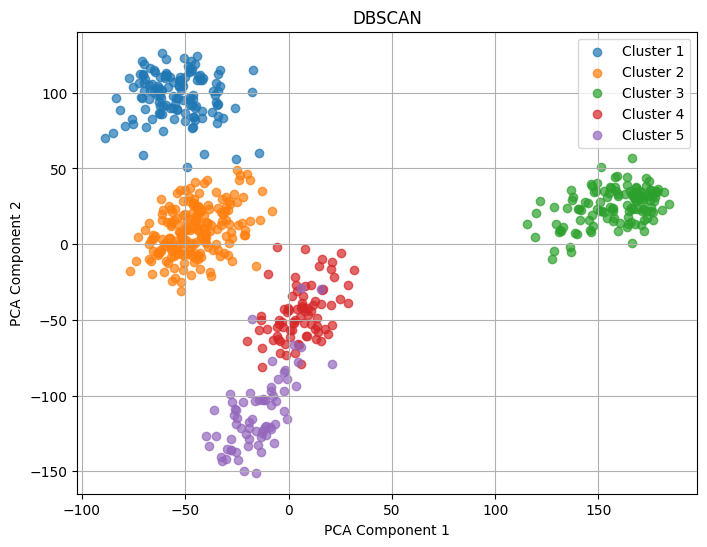

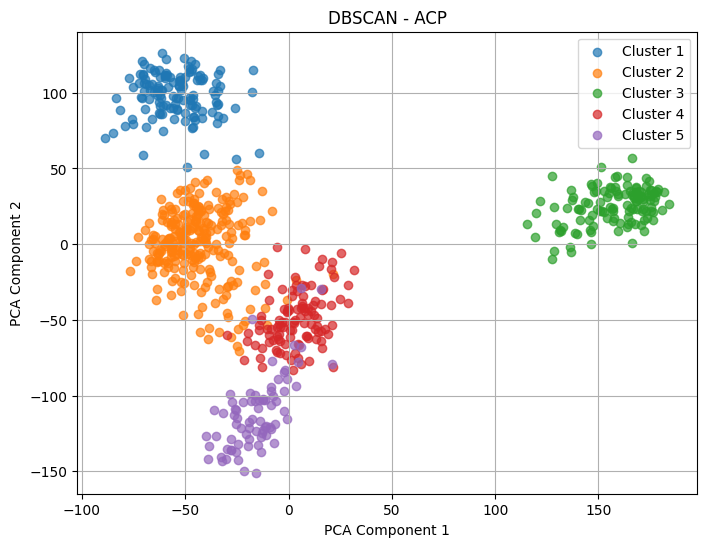

Méthode: DBSCAN
Silhouette Score:  0.15175359459804005
Davies-Bouldin Index:  2.63839608675355
Indice de Calinski-Harabasz:  76.7511760415202

Méthode: DBSCAN - ACP
Silhouette Score:  0.2784478803033407
Davies-Bouldin Index:  2.4126381014274663
Indice de Calinski-Harabasz:  149.99021796808972



In [6]:
for _ in range(1):

    memory = ut.Memory()
    timer = Timer()
    label_dbscan = cluster_hiseq.dbscan(175)
    timer.stop('DBSCAN')
    memory.stop()

    memory = ut.Memory()
    time = Timer()
    label_dbscan_acp = cluster_hiseq_acp.dbscan(125)
    time.stop('DBSCAN - ACP')
    memory.stop()

    # Affichage
    ut.plot_clusters(df_hiseq,label_dbscan, 'DBSCAN')
    ut.plot_clusters(df_hiseq,label_dbscan_acp, 'DBSCAN - ACP')

    # Évalusation
    ut.evaluate_cluster_interne(df_hiseq,label_dbscan, "DBSCAN")
    ut.evaluate_cluster_interne(df_hiseq_acp,label_dbscan_acp, 'DBSCAN - ACP')


### Spectral Clustering

Temps d'exécution Spectral Clustering: 1.0495 secondes
Mémoire actuelle : 0.04 MB
Pic mémoire : 131.74 MB
Temps d'exécution Spectral Clustering - ACP: 0.2013 secondes
Mémoire actuelle : 0.01 MB
Pic mémoire : 0.81 MB


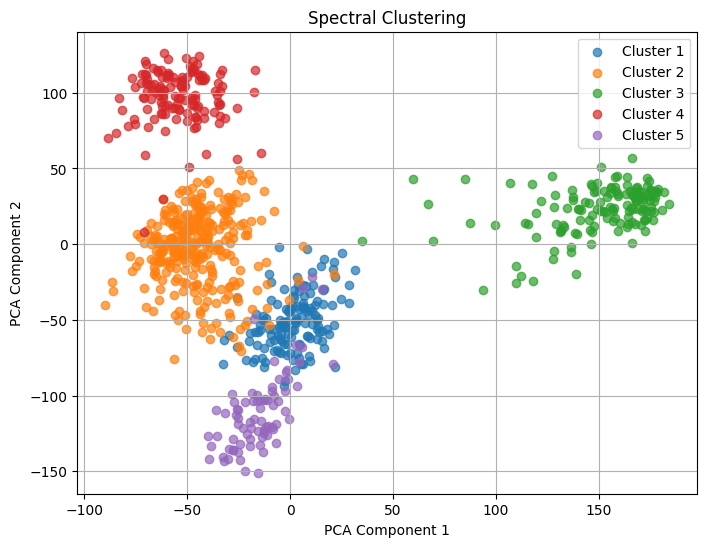

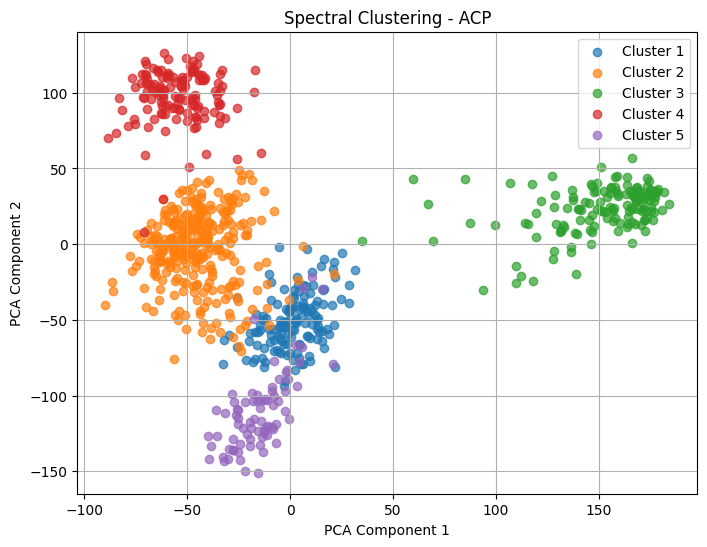

Méthode: Spectral Clustering
Silhouette Score:  0.22441563217214047
Davies-Bouldin Index:  1.830831953984228
Indice de Calinski-Harabasz:  124.591301729184

Méthode: Spectral Clustering - ACP
Silhouette Score:  0.3077433496635044
Davies-Bouldin Index:  1.431703311212999
Indice de Calinski-Harabasz:  198.00948818369167



In [7]:
for _ in range(1):

    memory = ut.Memory()
    timer = Timer()
    label_sc = cluster_hiseq.SpectralCluster()
    timer.stop('Spectral Clustering')
    memory.stop()

    memory = ut.Memory()
    time = Timer()
    label_sc_acp = cluster_hiseq_acp.SpectralCluster()
    time.stop('Spectral Clustering - ACP')
    memory.stop()

    # Affichage
    ut.plot_clusters(df_hiseq,label_sc, 'Spectral Clustering')
    ut.plot_clusters(df_hiseq,label_sc_acp, 'Spectral Clustering - ACP')

    # Évalusation
    ut.evaluate_cluster_interne(df_hiseq,label_sc, 'Spectral Clustering')
    ut.evaluate_cluster_interne(df_hiseq_acp,label_sc_acp, 'Spectral Clustering - ACP')





In [ ]:
##Algo isolation forest
model = Models.IF(100)

model.train(df_ecg[:,:-1])
labels = model.predict(df_ecg[:,:-1])

##Algo auto-encodeur

##Classic
classic_trainer = Train.Trainer(df_ecg)
classic_model = Models.AE(df_ecg[1].size -1)
classic_trainer.train_autoencoder(classic_model, epochs=100)


classic_scores_test_data = classic_trainer.anomaly_score(classic_model, on='test')
classic_scores_validation_data = classic_trainer.anomaly_score(classic_model, on='validation')

classic_threshold_test_data = np.percentile(classic_scores_test_data, 90)
classic_pred_test_data = (classic_scores_test_data > classic_threshold_test_data).astype(int)

classic_threshold_validation_data = np.percentile(classic_scores_test_data, 90)
classic_pred_validation_data = (classic_scores_test_data > classic_threshold_test_data).astype(int)


Epoch 0, Loss = 0.399729
Epoch 10, Loss = 0.333950
Epoch 20, Loss = 0.223948
Epoch 30, Loss = 0.063520
Epoch 40, Loss = 0.021419
Epoch 50, Loss = 0.011020
Epoch 60, Loss = 0.009158
Epoch 70, Loss = 0.007537
Epoch 80, Loss = 0.007012
Epoch 90, Loss = 0.006877


In [ ]:
pred = (labels == -1).astype(int)

ut.evaluate_anomalie(df_ecg[:,-1], pred, 'Isolation Forest')
#ut.evaluate_anomalie(df_ecg[:,-1], classic_pred_test_data, 'Classic auto-encoder')

Méthode: Isolation Forest
Exactitude:  0.5672268907563025
Rappel:  0.9102432339842412
Précision:  0.5829311101360246
F1-score:  0.7107128527484285
ROC-AUC:  0.49793065980116336

Méthode: Classic auto-encoder
Exactitude:  0.8315326130452181
Rappel:  0.7838300787941076
Précision:  0.9155662264905963
F1-score:  0.8445921004060539
ROC-AUC:  0.841169488651503

